In [13]:
#Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the data

In [14]:
#Reading all the datasets
df1 = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df2 = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
df3 = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
df4 = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
df5 = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
df6 = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
df7 = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
df8 = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df9 = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
df10 = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
df11 = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
df12 = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [15]:
#a
df1.head(3)
#observing the top 3 rows of the data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


Merging the datasets:

# 1

In [16]:
#merging the datasets using concat function
#b
df_merged = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [17]:
#renaming the columns
df_merged = df_merged.rename(columns = {"TEMP":"temp","PRES":"pres","DEWP":"dew_point_temp","RAIN":"rain","wd":"wind_direction","WSPM":"wind_speed"})

In [18]:
#checking the head to see if the column names have reflected
#c
df_merged.head(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pres,dew_point_temp,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


In [19]:
#checking datatypes of the merged dataframe
#d
df_merged.dtypes

No                  int64
year                int64
month               int64
day                 int64
hour                int64
PM2.5             float64
PM10              float64
SO2               float64
NO2               float64
CO                float64
O3                float64
temp              float64
pres              float64
dew_point_temp    float64
rain              float64
wind_direction     object
wind_speed        float64
station            object
dtype: object

In [20]:
#converting to categorical variables
#e
df_merged.year = df_merged.year.astype('category')
df_merged.month = df_merged.month.astype('category')

print(df_merged['year'].unique(),df_merged['month'].unique())

[2013, 2014, 2015, 2016, 2017]
Categories (5, int64): [2013, 2014, 2015, 2016, 2017] [3, 4, 5, 6, 7, ..., 10, 11, 12, 1, 2]
Length: 12
Categories (12, int64): [3, 4, 5, 6, ..., 11, 12, 1, 2]


# 2

# Checking for null values

In [21]:
#dropping unnecessary column
#a
df_merged = df_merged.drop('No',axis=1)
#dropping the No column as it doesn't add any information to the dataset

In [22]:
#checking for null values
#b
df_merged.isnull().sum()

year                  0
month                 0
day                   0
hour                  0
PM2.5              8739
PM10               6449
SO2                9021
NO2               12116
CO                20701
O3                13277
temp                398
pres                393
dew_point_temp      403
rain                390
wind_direction     1822
wind_speed          318
station               0
dtype: int64

In [23]:
#dropping null values in target variable 
#b
df_merged.dropna(subset = ['PM2.5'], inplace = True)
df_merged.isnull().sum()/df_merged.count()
df_merged = df_merged.dropna()

As the null values are less than 9% of the whole dataset after dropping the target variable null values. we can afford till 10% of the dataset as it is large.

In [24]:
#checking for null values again
df_merged.isnull().sum()

year              0
month             0
day               0
hour              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
temp              0
pres              0
dew_point_temp    0
rain              0
wind_direction    0
wind_speed        0
station           0
dtype: int64

In [27]:
# labelling the months
#b
df = df_merged.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)
custom_dict = {'Jan':0, 'Feb':1,'Mar':2,'Apr':3,'May':4,'Jun':5,'Jul':6,'Aug':7,'Sep':8,'Oct':9,'Nov':10,'Dec':11}


Created custom dictionary for mapping the values of months to jan,feb and march

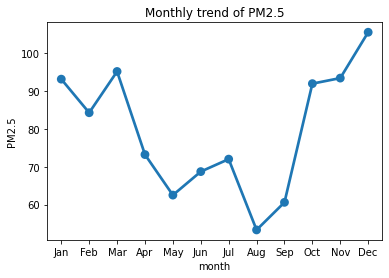

In [28]:
#plotting the lineplot
plt.title('Monthly trend of PM2.5')
df = df_merged[['PM2.5','month']].groupby(["month"]).mean().reset_index().sort_values(by='month',ascending=True)
df = df.iloc[df['month'].map(custom_dict).argsort()]
sns.pointplot(x='month', y='PM2.5', data=df)

PM2.5 levels hit all time low in aug and all time high in december in these 5 years from 2013 to 2017

Text(0.5, 1.0, 'Box plot for target variable')

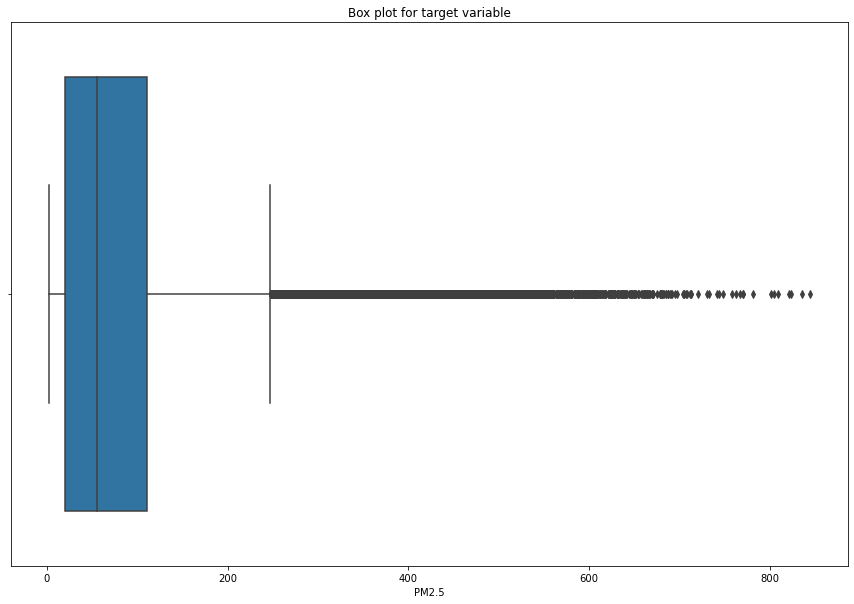

In [29]:
#Box plot for the target variable
#c
plt.figure(figsize=(15,10))
sns.boxplot(x="PM2.5",data = df_merged)
plt.title("Box plot for target variable")

Almost all the stations have lower PM2.5 values and the 25 to 75 percentile ranges from 25 to  near 150 and there are so many outliers. The distribution is right skewed as we can see there are many values to the right and median to the left

In [30]:
#calcluating mean,max, min and standard deviation for all the districts or stations
#d
df_merged_station = df_merged.groupby('station')
df_merged_station['PM2.5'].describe().drop(columns =  ['count', '25%', '50%', '75%'])

,mean,std,min,max
station,,,,
Aotizhongxin,81.863630,80.449490,3.0,713.0
Changping,70.312328,70.955607,3.0,662.0
Dingling,66.512518,72.434045,3.0,647.0
Dongsi,84.933156,85.283368,3.0,695.0
Guanyuan,83.101051,81.448350,3.0,680.0
Gucheng,83.865653,82.956802,2.0,770.0
Huairou,70.285669,71.171533,2.0,683.0
Nongzhanguan,84.720783,85.633679,2.0,844.0
Shunyi,79.400725,81.222687,2.0,762.0


Text(0.5, 0, 'PM2.5')

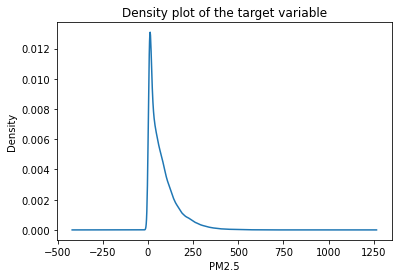

In [31]:
#checking the distribution
#f
df_merged['PM2.5'].plot.density()
plt.title('Density plot of the target variable')
plt.xlabel('PM2.5')

Text(0.5, 0, 'PM2.5')

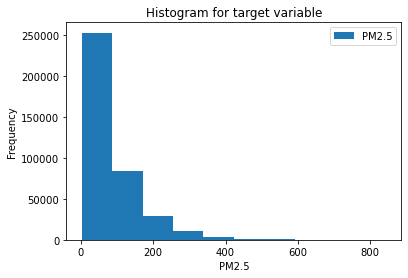

In [32]:
#plotting histogram for checking distribution
df_merged['PM2.5'].plot(kind = 'hist', legend = True)
plt.title('Histogram for target variable')
plt.xlabel('PM2.5')

The distribution of the target variable is right skewed as the right tail contains more values. More than 60% of the dataset values contain in the range of 0 to 200.

# 3

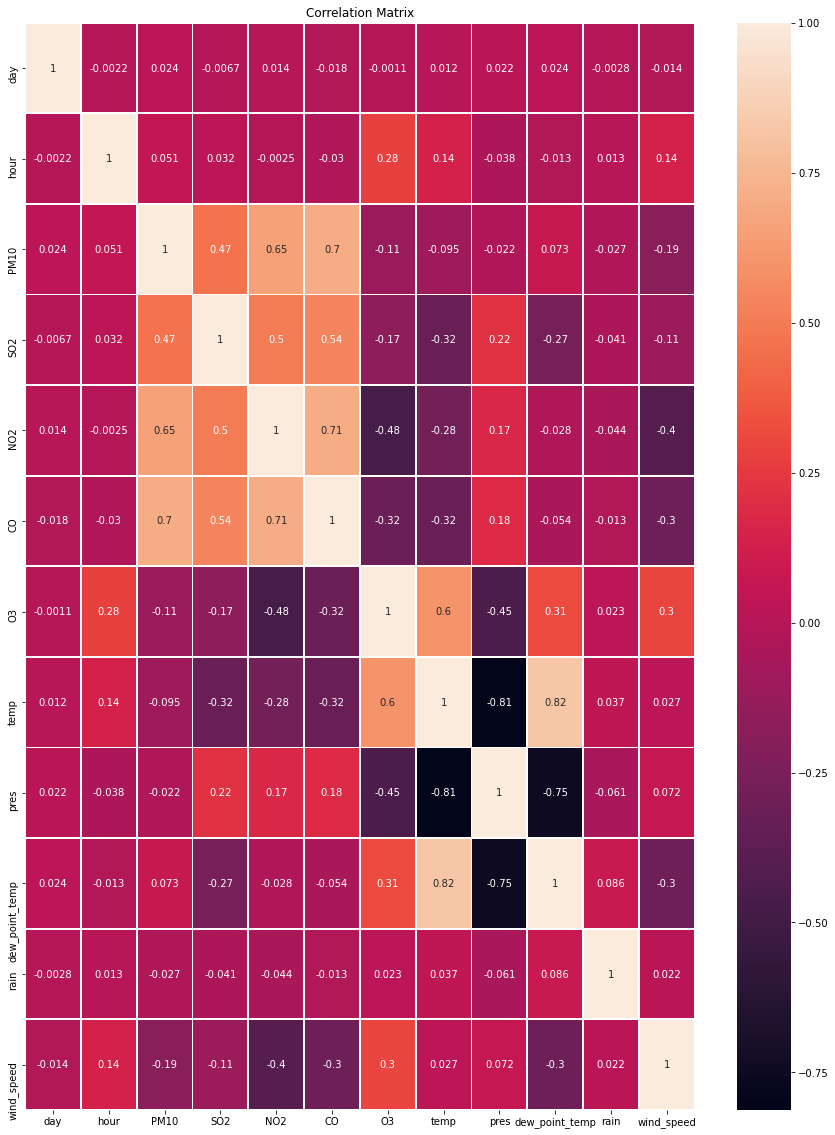

In [33]:
#checking the relation between independent variables
#a
plt.figure(figsize=(15, 20))
plt.title('Correlation Matrix')
sns.heatmap(df_merged.iloc[:,df_merged.columns != 'PM2.5'].corr(), annot=True, linewidth = 0.75)
plt.show()

Temp is highly correlated with pres and dew_point_temp as the correlation coefficient is more than 0.8

In [34]:
#b
df_2013 = df_merged[df_merged['year'] == 2013]
df_2017 = df_merged[df_merged['year'] == 2017]

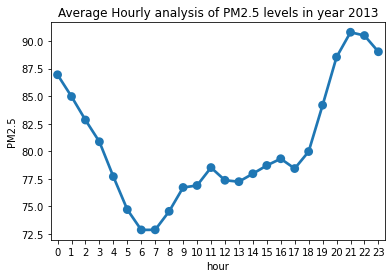

In [35]:
plt.title('Average Hourly analysis of PM2.5 levels in year 2013')
df_2013 = df_2013[['PM2.5','hour']].groupby(["hour"]).mean().reset_index().sort_values(by='hour',ascending = False)
sns.pointplot(x='hour',y='PM2.5', data = df_2013)


In the year 2013, the change in levels of PM2.5 are very high in the evening. PM2.5 level are least in the morning at 6am. Highest pollution hour for 2013 is at 21:00hrs

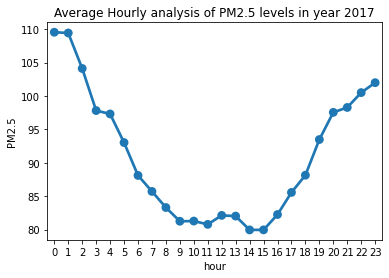

In [36]:
plt.title('Average Hourly analysis of PM2.5 levels in year 2017')
df_2017 = df_2017[['PM2.5','hour']].groupby(["hour"]).mean().reset_index().sort_values(by='hour',ascending = False)
sns.pointplot(x='hour',y='PM2.5', data = df_2017)

In the year 2017, the change in levels of PM2.5 are very high in the evening and early morning. PM2.5 level are least in the afternoon at 2pm. Highest pollution hour for 2017 is at 1 am

In [37]:
#c
Q1=df_merged['PM2.5'].quantile(0.25)
Q3=df_merged['PM2.5'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
df_out=pd.DataFrame()
df_out=df_merged[(df_merged['PM2.5']<(Q1-1.5*IQR))|(df_merged['PM2.5']>(Q3+1.5*IQR))]
print(df_out.shape)
df_merged=df_merged[~((df_merged['PM2.5']<(Q1-1.5*IQR))|(df_merged['PM2.5']>(Q3+1.5*IQR)))]
df_merged.shape

91.0
(17638, 17)


(364530, 17)

After removing the outliers, data comes closer to each other as the standard deviation decreases

In [38]:
df_merged.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'temp', 'pres', 'dew_point_temp', 'rain', 'wind_direction',
       'wind_speed', 'station'],
      dtype='object')

In [39]:
#reindexing to make sure PM2.5 is the last column
#d
df_merged = df_merged.reindex(columns = ['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'temp', 'pres', 'dew_point_temp', 'rain', 'wind_direction',
       'wind_speed', 'station', 'PM2.5'])